<a href="https://colab.research.google.com/github/n1lima/correlacao-enem-idhm-2021/blob/main/dataPcg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

# Importando Dados - Enem


In [3]:
microdados_enem = pd.read_csv('MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')

In [4]:
microdados_enem.shape

(27725, 76)

In [5]:
retirar_enem = ['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC','TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5','Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

#retirando colunas desnecessárias para nossa análise (Execute a célula somente uma vez!)
microdados_enem.drop(columns=retirar_enem, axis=1, inplace=True)

In [6]:
microdados_enem.columns

Index(['SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [7]:
# Fazendo uma cópia do DataFrame 'microdados_enem' em um novo DataFrame chamado 'seg_enem'
# para que possamos modificar os dados sem afetar o DataFrame original.
seg_enem = microdados_enem.copy()

# Importando Dados - IDHM por RM

In [8]:
dados_idhm = pd.read_excel('ADH_BASE_RADAR_2012-2021.xlsx')

In [9]:
#  Este conjunto de dados tem 490 linhas e 83 colunas
dados_idhm.shape

(490, 83)

In [10]:
# selecionando dados apenas de 2021 e as Regiões Metropolitadas
dados_idhm21 = dados_idhm[(dados_idhm['ANO'] == 2021) & (dados_idhm['AGREGACAO'] == 'RM_RIDE')].copy()
dados_idhm21.shape

(21, 83)

In [11]:
#retirando colunas que não iremos usar para a análise
retirar_idhm = ['CODIGO', 'IDHM_L', 'IDHM_E',
       'IDHM_R', 'I_ESCOLARIDADE', 'I_FREQ_PROP', 'IDHMAD', 'IDHMAD_L',
       'IDHMAD_E', 'IDHMAD_R', 'ATK_ESPVIDA', 'ATK_ANOSEST', 'ATK_RDPC',
       'IDHMAD_PERDA', 'IDHMAD_L_PERDA', 'IDHMAD_E_PERDA', 'IDHMAD_R_PERDA',
       'IDHMAD_COEF', 'ESPVIDA', 'MORT1', 'T_ENV', 'RAZDEP', 'T_FREQ5A6',
       'T_FUND11A13', 'T_FUND15A17', 'T_MED18A20', 'T_FUND18M', 'ANOSEST',
       'T_ANALF15M', 'T_ANALF18M', 'T_ANALF25M', 'T_FREQ6A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FUND18A24', 'T_FUND25M', 'T_MED25M', 'T_SUPER25M',
       'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND', 'T_FLBAS', 'T_FLFUND',
       'T_FLMED', 'T_FLSUPER', 'RDPC', 'RDPCT', 'RENOCUP', 'PRENTRAB', 'RDPC1',
       'RDPC2', 'RDPC3', 'RDPC4', 'RDPC5', 'RDPC10', 'R1040', 'R2040', 'GINI',
       'THEIL', 'PIND', 'PMPOB', 'PPOB', 'RIND', 'RMPOB', 'RPOB', 'POPTOT',
       'POP', 'POPT', 'POP5A6', 'POP6A14', 'POP6A17', 'POP11A13', 'POP15A17',
       'POP15M', 'POP18A20', 'POP18A24', 'POP18M', 'POP25M', 'POP65M',
       'POPOCUP18M']

#retirando colunas desnecessárias para nossa análise (Execute a célula somente uma vez!)
dados_idhm21.drop(columns=retirar_idhm, axis=1, inplace=True)

In [12]:
dados_idhm21.columns

Index(['ANO', 'AGREGACAO', 'NOME', 'IDHM'], dtype='object')

In [13]:
# Fazendo uma cópia do DataFrame 'dados_idhm' em um novo DataFrame chamado 'seg_idhm'
# para que possamos modificar os dados sem afetar o DataFrame original.
seg_idhm = dados_idhm21.copy()

#Mapeamento de Regiões Metropolitanas

In [14]:
estados_rm = {
    'AM': 'Região Metropolitana de Manaus (AM)',
    'PA': 'Região Metropolitana de Belém (PA)',
    'AP': 'Região Metropolitana de Macapá (AP)',
    'MA': 'Região Metropolitana de Grande São Luís (MA)',
    'PI': 'Região Administrativa Integrada de Desenvolvimento da Grande Teresina (PI)',
    'CE': 'Região Metropolitana de Fortaleza (CE)',
    'RN': 'Região Metropolitana de Natal (RN)',
    'PB': 'Região Metropolitana de João Pessoa (PB)',
    'PE': 'Região Metropolitana de Recife (PE)',
    'AL': 'Região Metropolitana de Maceió (AL)',
    'SE': 'Região Metropolitana de Aracaju (SE)',
    'BA': 'Região Metropolitana de Salvador (BA)',
    'MG': 'Região Metropolitana de Belo Horizonte (MG)',
    'ES': 'Região Metropolitana de Grande Vitória (ES)',
    'RJ': 'Região Metropolitana de Rio de Janeiro (RJ)',
    'SP': 'Região Metropolitana de São Paulo (SP)',
    'PR': 'Região Metropolitana de Curitiba (PR)',
    'SC': 'Região Metropolitana de Florianópolis (SC)',
    'RS': 'Região Metropolitana de Porto Alegre (RS)',
    'MT': 'Região Metropolitana de Vale do Rio Cuiabá (MT)',
    'GO': 'Região Metropolitana de Goiânia (GO)'
}


In [15]:
# Criando uma nova coluna com a região metropolitana, mapeando os códigos de estado
seg_enem['RM'] = seg_enem['SG_UF_ESC'].map(estados_rm)

In [16]:
seg_enem['RM']

,RM
0,NaN
1,NaN
2,NaN
3,Região Metropolitana de Fortaleza (CE)
4,Região Metropolitana de Fortaleza (CE)
...,...
27720,NaN
27721,NaN
27722,NaN
27723,NaN


In [17]:
# Verifica se há algum NaN na coluna 'RM'
if seg_enem['RM'].isnull().any():
    seg_enem.dropna(subset=['RM'],inplace=True)

In [18]:
seg_enem['RM']

,RM
3,Região Metropolitana de Fortaleza (CE)
4,Região Metropolitana de Fortaleza (CE)
14,Região Metropolitana de Salvador (BA)
33,Região Metropolitana de Salvador (BA)
45,Região Metropolitana de Grande Vitória (ES)
...,...
27702,Região Metropolitana de Salvador (BA)
27706,Região Metropolitana de Rio de Janeiro (RJ)
27709,Região Metropolitana de Fortaleza (CE)
27713,Região Metropolitana de Fortaleza (CE)


In [19]:
seg_enem.drop(columns=['SG_UF_ESC'], inplace=True)

In [20]:
seg_enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,RM
3,580.70,678.90,638.90,659.50,780.00,Região Metropolitana de Fortaleza (CE)
4,497.70,532.40,457.60,582.60,780.00,Região Metropolitana de Fortaleza (CE)
14,NaN,NaN,NaN,NaN,NaN,Região Metropolitana de Salvador (BA)
33,414.60,410.10,386.70,423.00,700.00,Região Metropolitana de Salvador (BA)
45,476.80,608.50,534.20,570.20,640.00,Região Metropolitana de Grande Vitória (ES)


# Média das notas do enem

In [21]:
seg_enem['MEDIA_NOTAS'] = seg_enem[['NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_REDACAO']].fillna(0).mean(axis=1)

In [22]:
seg_enem = seg_enem.groupby('RM')['MEDIA_NOTAS'].mean().sort_values(ascending=False).reset_index().copy()

In [23]:
seg_enem

,RM,MEDIA_NOTAS
0,Região Metropolitana de Belo Horizonte (MG),563.21
1,Região Metropolitana de Natal (RN),536.86
2,Região Metropolitana de Maceió (AL),536.63
3,Região Metropolitana de Porto Alegre (RS),536.23
4,Região Metropolitana de Aracaju (SE),525.72
5,Região Metropolitana de São Paulo (SP),521.02
6,Região Metropolitana de Rio de Janeiro (RJ),515.44
7,Região Metropolitana de Curitiba (PR),514.19
8,Região Metropolitana de Florianópolis (SC),512.99
9,Região Administrativa Integrada de Desenvolvim...,509.18


# Agrupando os dados


In [24]:
seg_idhm.columns

Index(['ANO', 'AGREGACAO', 'NOME', 'IDHM'], dtype='object')

In [25]:
seg_enem.columns

Index(['RM', 'MEDIA_NOTAS'], dtype='object')

In [26]:
seg_idhm.rename(columns={'NOME':'RM'}, inplace=True)
seg_idhm['ANO'] = seg_idhm['ANO'].replace(',', '').astype(int)

In [27]:
dados_2021 = seg_idhm.merge(seg_enem, on='RM', how='inner').sort_values(by=['MEDIA_NOTAS'], ascending=False).reset_index(drop=True)

In [28]:
dados_2021

,ANO,AGREGACAO,RM,IDHM,MEDIA_NOTAS
0,2021,RM_RIDE,Região Metropolitana de Belo Horizonte (MG),0.80,563.21
1,2021,RM_RIDE,Região Metropolitana de Natal (RN),0.74,536.86
2,2021,RM_RIDE,Região Metropolitana de Maceió (AL),0.72,536.63
3,2021,RM_RIDE,Região Metropolitana de Porto Alegre (RS),0.79,536.23
4,2021,RM_RIDE,Região Metropolitana de Aracaju (SE),0.74,525.72
5,2021,RM_RIDE,Região Metropolitana de São Paulo (SP),0.84,521.02
6,2021,RM_RIDE,Região Metropolitana de Rio de Janeiro (RJ),0.81,515.44
7,2021,RM_RIDE,Região Metropolitana de Curitiba (PR),0.81,514.19
8,2021,RM_RIDE,Região Metropolitana de Florianópolis (SC),0.83,512.99
9,2021,RM_RIDE,Região Administrativa Integrada de Desenvolvim...,0.72,509.18


# Gráficos

In [29]:
sns.set_theme(style='whitegrid', context='talk')

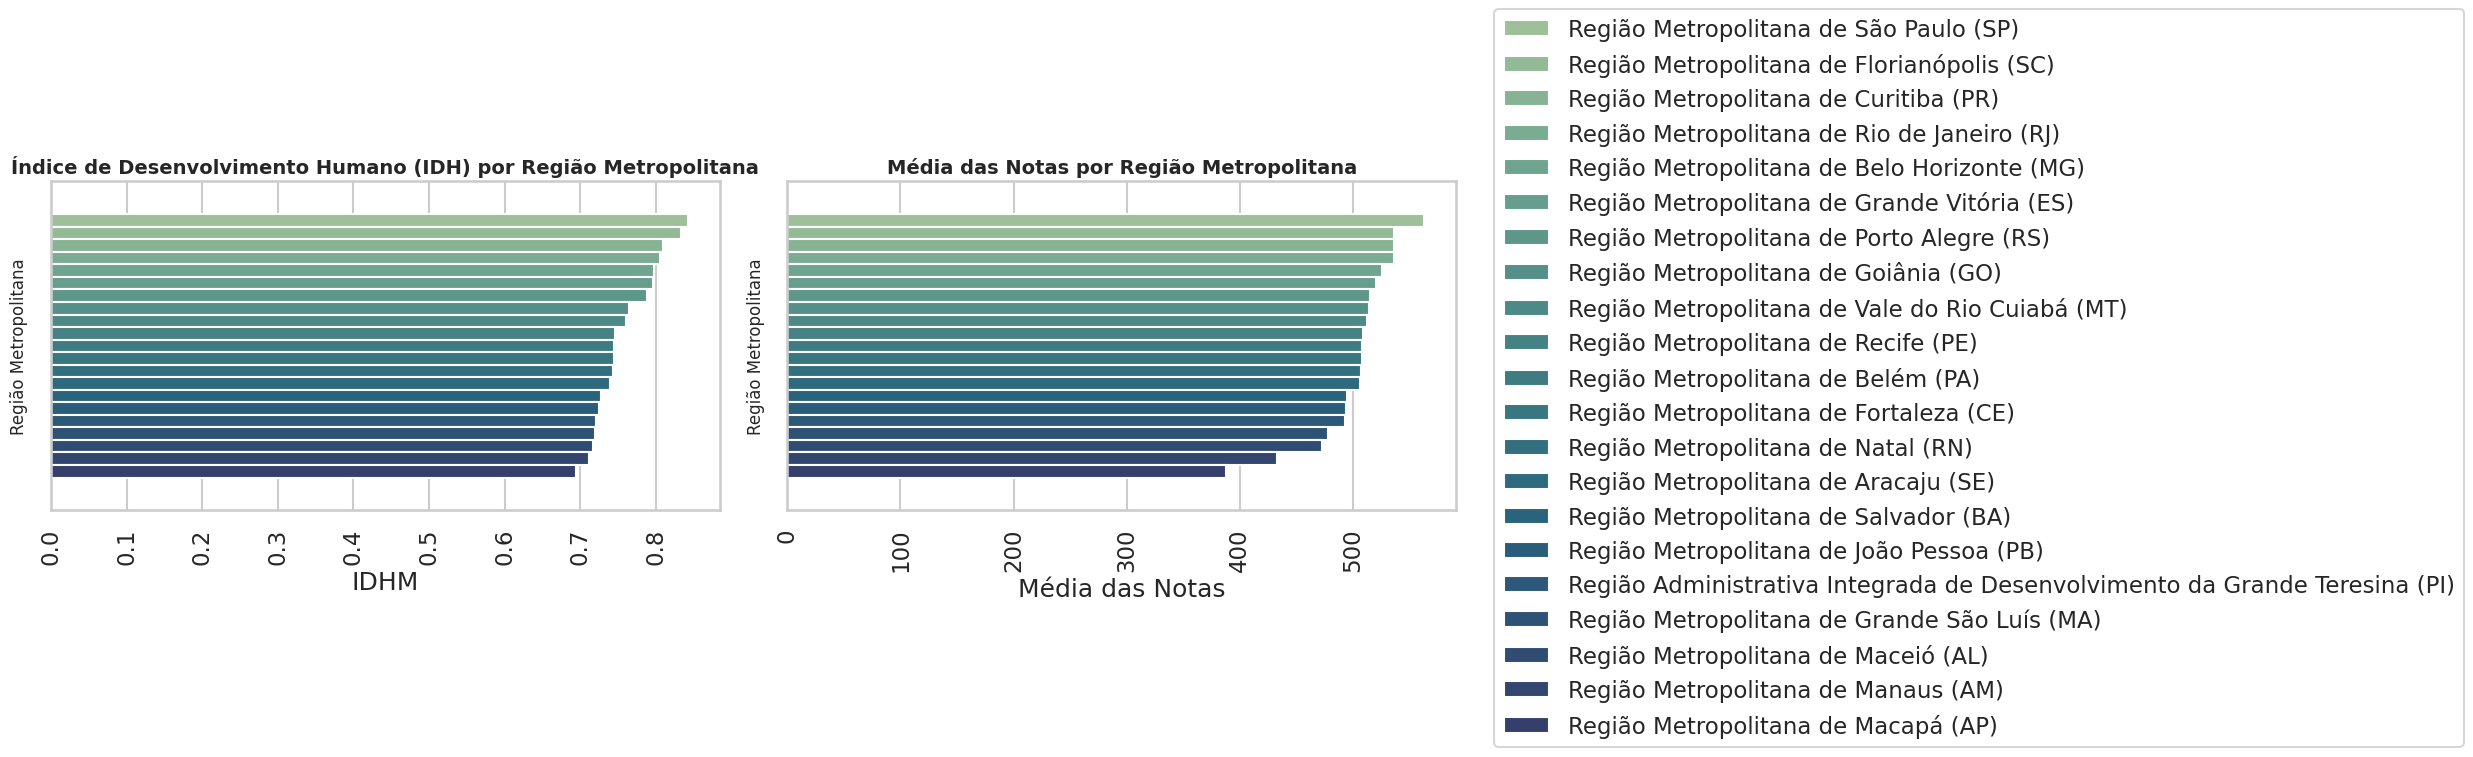

In [30]:
# Cria subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 linha, 2 colunas

# Gráfico 1: IDHM
dados_2021 = dados_2021.sort_values('IDHM', ascending=False)
sns.barplot(data=dados_2021, x='IDHM', hue='RM', ax=axes[0], palette='crest')
axes[0].set_title('IDHM por Região Metropolitana')
axes[0].set_xlabel('IDHM')
axes[0].tick_params(axis='x', rotation=90)

axes[0].set_title('Índice de Desenvolvimento Humano (IDH) por Região Metropolitana', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Região Metropolitana', fontsize=12)

# Gráfico 2: Média das Notas
dados_2021 = dados_2021.sort_values('MEDIA_NOTAS', ascending=False)
sns.barplot(data=dados_2021, x='MEDIA_NOTAS', hue='RM', ax=axes[1], palette='crest')
axes[1].set_title('Média das Notas por Região Metropolitana')
axes[1].set_xlabel('Média das Notas')
axes[1].tick_params(axis='x', rotation=90)

axes[1].set_title('Média das Notas por Região Metropolitana', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Região Metropolitana', fontsize=12)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Ajusta o layout e exibe os gráficos
plt.tight_layout()
plt.show()

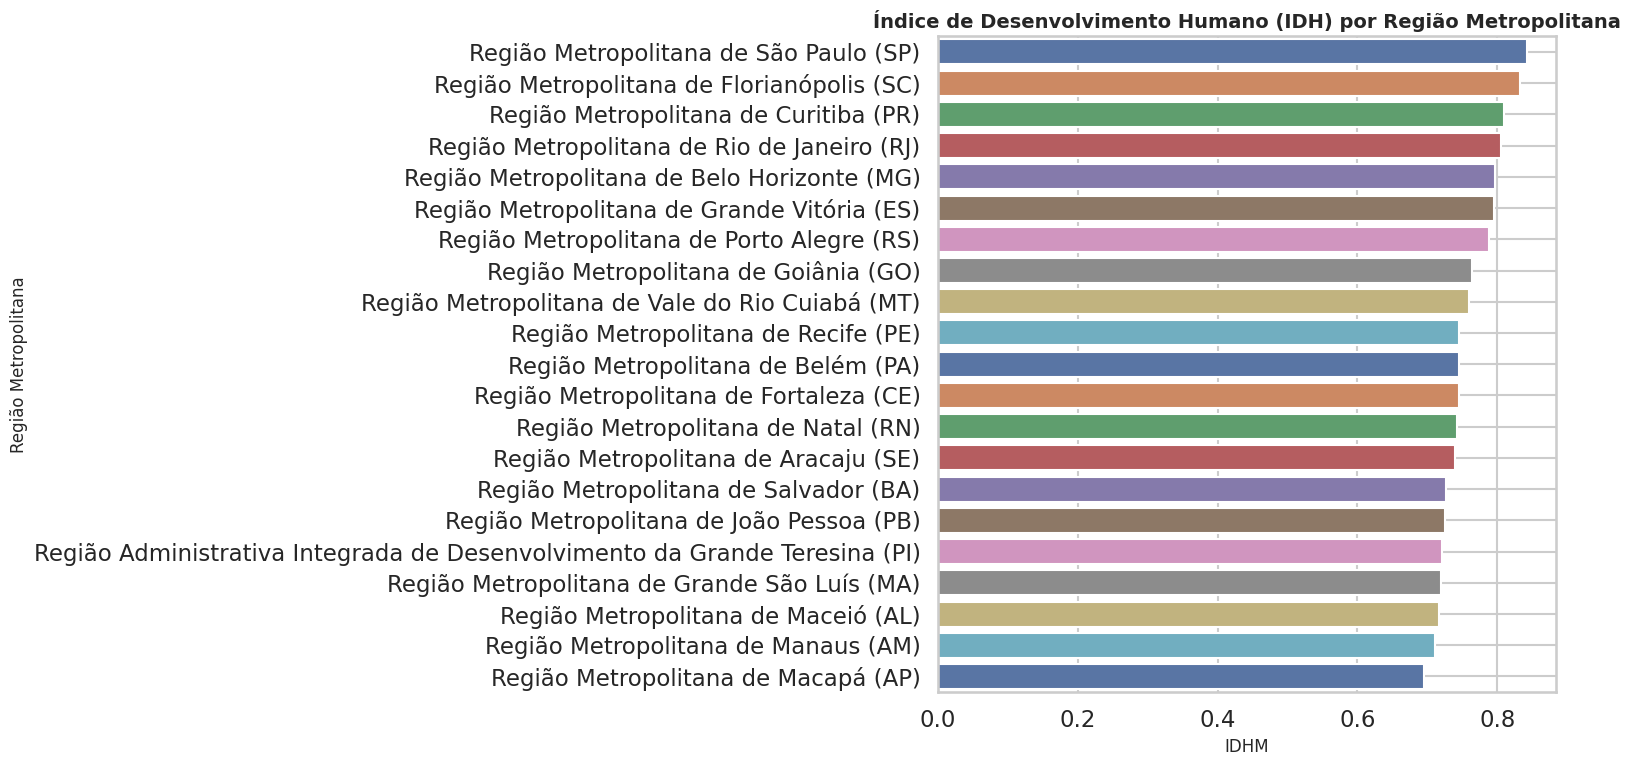

In [31]:
# Gráfico 1: IDHM por Região Metropolitana
dados_2021 = dados_2021.sort_values('IDHM', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=dados_2021, y='RM', x='IDHM', hue='RM', palette='deep')
plt.title('Índice de Desenvolvimento Humano (IDH) por Região Metropolitana', fontsize=14, fontweight='bold')
plt.xlabel('IDHM', fontsize=12)
plt.ylabel('Região Metropolitana', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()


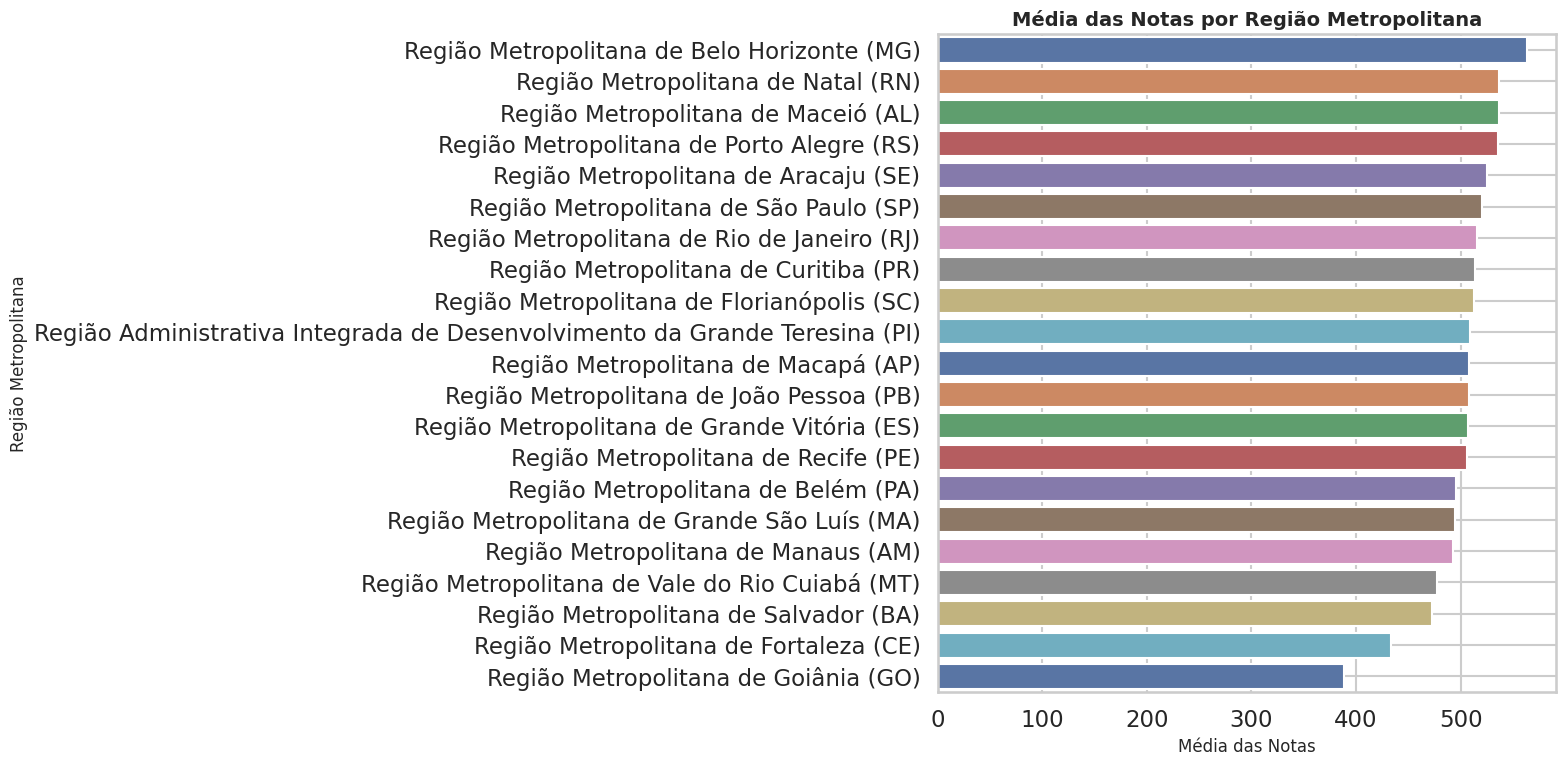

In [35]:
# Gráfico 2: Média das Notas por Região Metropolitana
dados_2021 = dados_2021.sort_values('MEDIA_NOTAS', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(data=dados_2021, y='RM', x='MEDIA_NOTAS', hue='RM', palette='deep')
plt.title('Média das Notas por Região Metropolitana', fontsize=14, fontweight='bold')
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('Região Metropolitana', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-33-6e30d7641928>:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


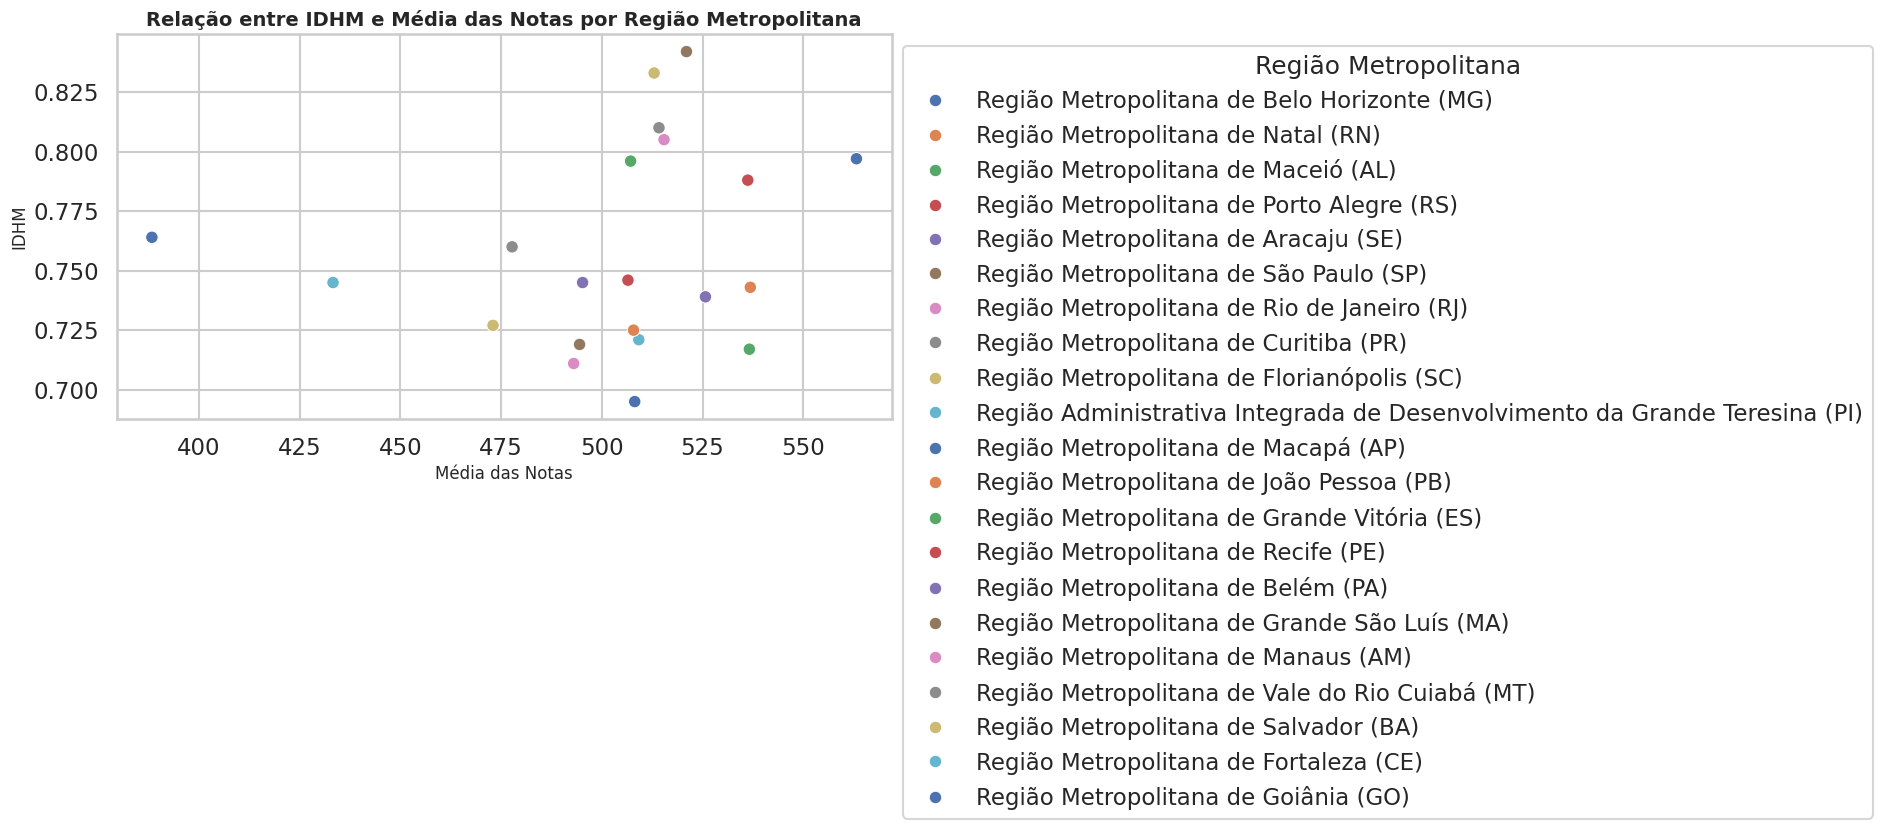

In [33]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=dados_2021, x='MEDIA_NOTAS', y='IDHM', hue='RM', palette='deep')

plt.title('Relação entre IDHM e Média das Notas por Região Metropolitana', fontsize=14, fontweight='bold')
plt.xlabel('Média das Notas', fontsize=12)
plt.ylabel('IDHM', fontsize=12)
plt.legend(title='Região Metropolitana', bbox_to_anchor=(1, 1), loc='upper left')  # Coloca a legenda fora do gráfico

plt.tight_layout()
plt.show()


# Correlação entre as duas Variáveis

In [ ]:
correlacao = dados_2021['IDHM'].corr(dados_2021['MEDIA_NOTAS'])
print(correlacao)

0.22805268546115273


Valor obtido foi 0,23 (aproximadamente). Isso significa que há uma correlação positiva fraca entre essas duas variáveis.
Interpretação do valor:
0,23 é uma correlação positiva, ou seja, quando o IDHM aumenta, as médias das notas também tendem a aumentar, mas de forma relativamente fraca.
Essa correlação sugere que, embora haja uma tendência, ela não é muito forte. Existem muitos outros fatores influenciando tanto o IDHM quanto as notas do ENEM, por isso essa correlação fraca.

In [ ]:
correlacao_spearman = dados_2021['IDHM'].corr(dados_2021['MEDIA_NOTAS'], method='spearman')
print(correlacao_spearman)

0.32348166694716285


In [ ]:
Demonstra um correlação mais forte entre as duas variáveis, mas mesmo assim continua fraca.